# Player Stats Prediction
The realm of NFL sports analytics offers vast opportunities to explore the performance and predict future outcomes of teams and players. Our project zeroes in on the challenge of predicting the top players based on their fantasy  points in specific positions— wide receivers (WRs), cornerbacks (CBs), and linebackers (LBs)— based on a variety of performance metrics. The objective is to utilize historical data to uncover patterns and trends that can highlight the key factors contributing to a player's success on the field. This endeavor not only deepens our understanding of player performance dynamics but also has practical applications in fantasy sports and team management. Our project utilizes data from the Player Season Stats API endpoint from SportsDataIO.

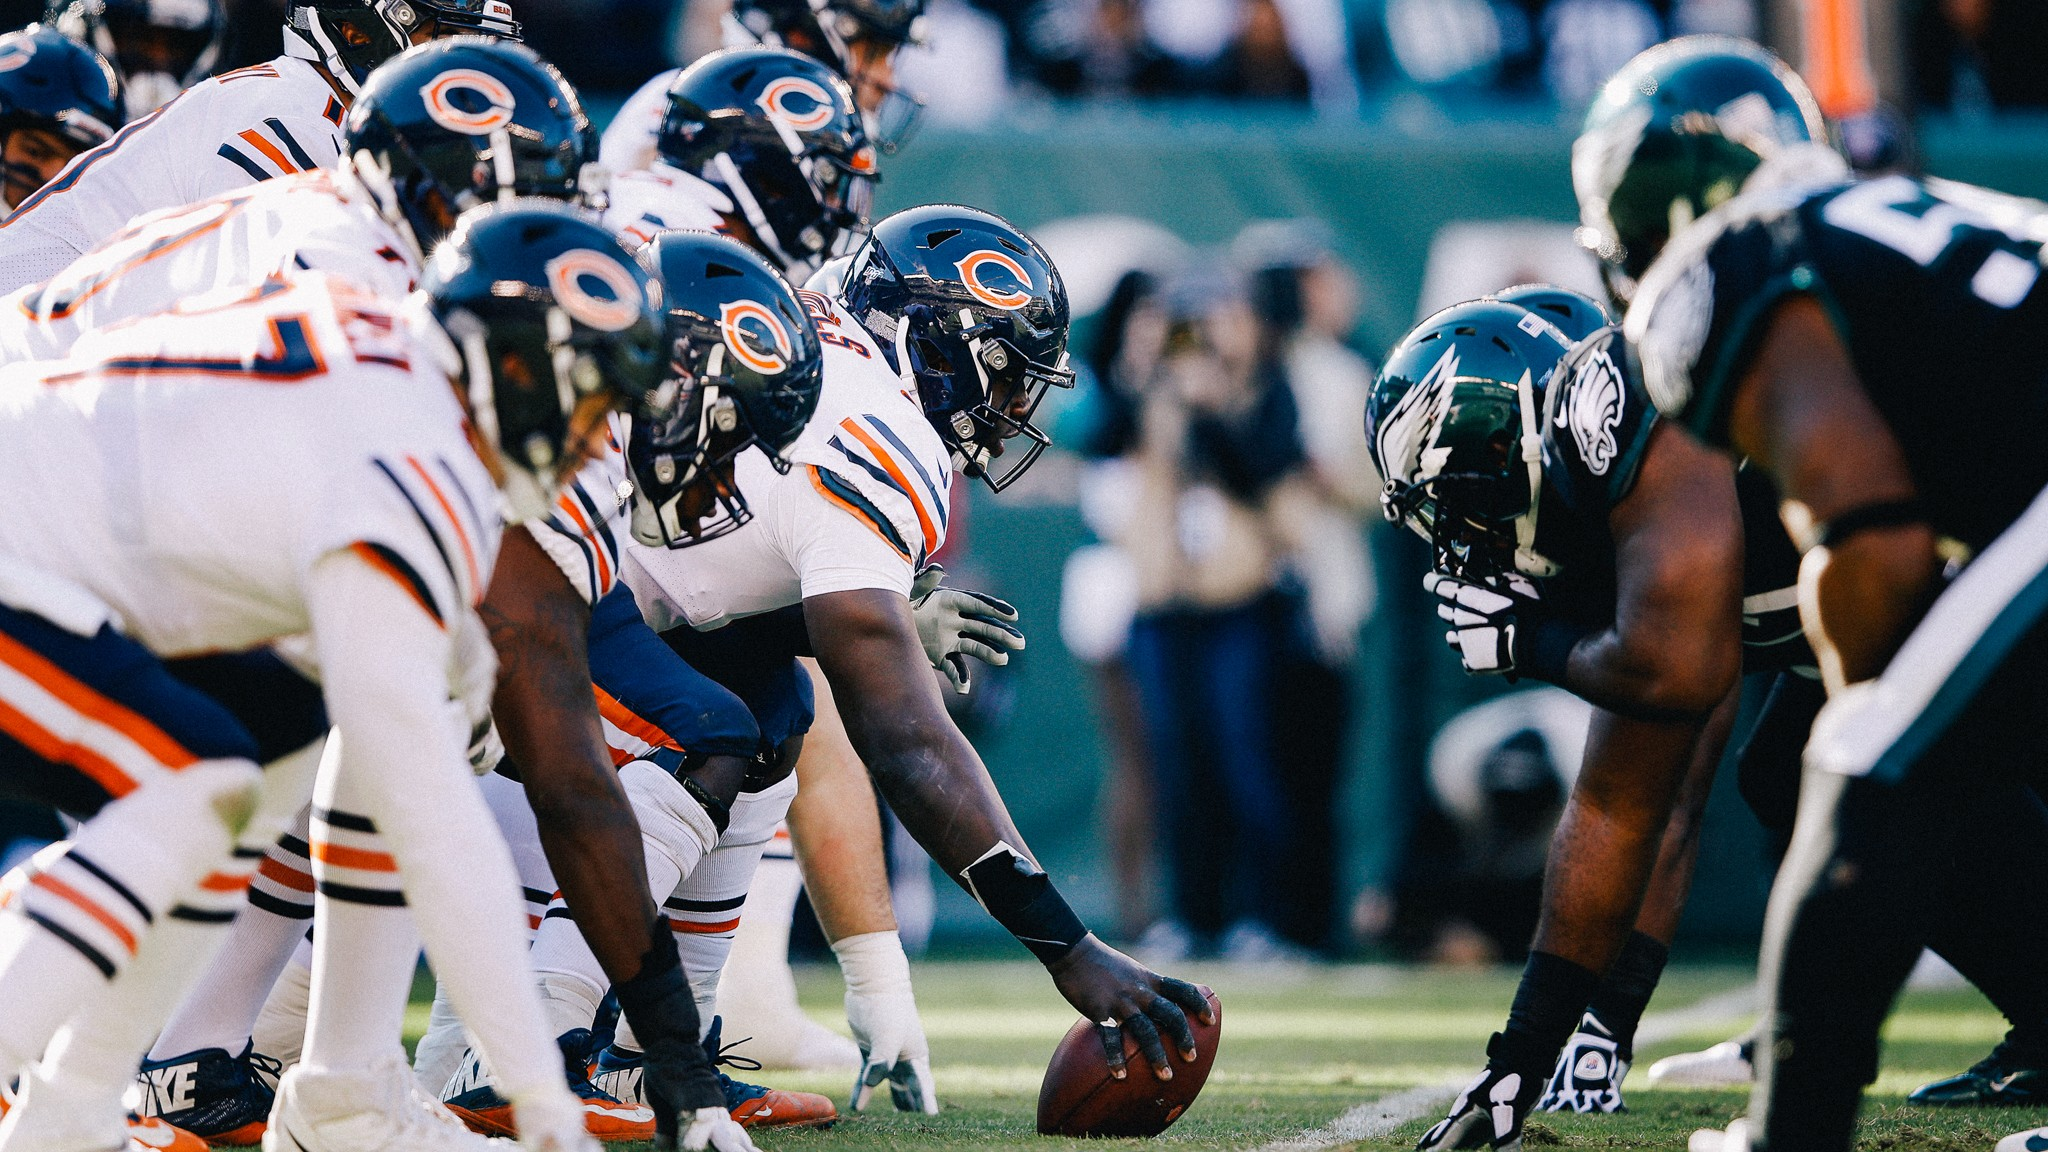

Image: https://www.dazn.com/en-US/news/american-football/how-long-does-an-nfl-game-last-how-long-is-halftime/vfl52uf8ziqd1egjygen4urkb

Dataset: https://sportsdata.io/developers/api-documentation/nfl

# Part 1: Collection/Storage & Data Preprocessing

In [1]:
# Imports
import requests
import pymongo
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

warnings.filterwarnings("ignore")

# Connect to mongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["cse482sports_database"]  

# Fetch data from API with endpoint
player_season_stats_endpt = "https://api.sportsdata.io/v3/nfl/stats/json/PlayerSeasonStats/2023REG?key=cf2cf0bb18864d59a1b5d72af77b6883"
print("Fetching data from the API...")
response = requests.get(player_season_stats_endpt)
data = response.json()

# Insert into database
collection = db["nfl_teams"]  
collection.insert_many(data)

print("Data inserted successfully into MongoDB.")

Fetching data from the API...
Data inserted successfully into MongoDB.


In [14]:
# Fetch data
player_season_stats_response = requests.request("GET", player_season_stats_endpt)

In [15]:
# Function for creating the data frame
def get_data(response):
    if response.status_code == 200:
        sports_data = response.json()
        df = pd.DataFrame(sports_data)
        print("Columns/Attributes:", df.columns.tolist())
    else:
        print('Failed to retrieve data:', response.status_code, response.text)
    df = pd.DataFrame(sports_data)
    return df

In [16]:
# Get data frame
get_data(player_season_stats_response)

Columns/Attributes: ['PlayerID', 'SeasonType', 'Season', 'Team', 'Number', 'Name', 'Position', 'PositionCategory', 'Activated', 'Played', 'Started', 'PassingAttempts', 'PassingCompletions', 'PassingYards', 'PassingCompletionPercentage', 'PassingYardsPerAttempt', 'PassingYardsPerCompletion', 'PassingTouchdowns', 'PassingInterceptions', 'PassingRating', 'PassingLong', 'PassingSacks', 'PassingSackYards', 'RushingAttempts', 'RushingYards', 'RushingYardsPerAttempt', 'RushingTouchdowns', 'RushingLong', 'ReceivingTargets', 'Receptions', 'ReceivingYards', 'ReceivingYardsPerReception', 'ReceivingTouchdowns', 'ReceivingLong', 'Fumbles', 'FumblesLost', 'PuntReturns', 'PuntReturnYards', 'PuntReturnYardsPerAttempt', 'PuntReturnTouchdowns', 'PuntReturnLong', 'KickReturns', 'KickReturnYards', 'KickReturnYardsPerAttempt', 'KickReturnTouchdowns', 'KickReturnLong', 'SoloTackles', 'AssistedTackles', 'TacklesForLoss', 'Sacks', 'SackYards', 'QuarterbackHits', 'PassesDefended', 'FumblesForced', 'FumblesReco

,PlayerID,SeasonType,Season,Team,Number,Name,Position,PositionCategory,Activated,Played,...,AverageDraftPosition,AverageDraftPositionPPR,TeamID,GlobalTeamID,FantasyPointsFantasyDraft,AverageDraftPositionRookie,AverageDraftPositionDynasty,AverageDraftPosition2QB,OffensiveFumbleRecoveryTouchdowns,ScoringDetails
0,549,1,2023,ARI,5,M.Prater,K,ST,17,17,...,None,None,1,1,0.0,None,None,None,None,"[{'GameKey': '202310135', 'SeasonType': 1, 'Pl..."
1,611,1,2023,CLE,15,J.Flacco,QB,OFF,5,5,...,None,None,8,8,98.4,None,None,None,None,"[{'GameKey': '202311332', 'SeasonType': 1, 'Pl..."
2,1694,1,2023,NYG,21,M.Crosby,K,ST,3,3,...,None,None,23,23,0.0,None,None,None,None,"[{'GameKey': '202311626', 'SeasonType': 1, 'Pl..."
3,2593,1,2023,NYJ,8,A.Rodgers,QB,OFF,1,1,...,None,None,24,24,0.0,None,None,None,None,[]
4,3061,1,2023,CHI,84,M.Lewis,TE,OFF,17,17,...,None,None,6,6,10.4,None,None,None,None,"[{'GameKey': '202311606', 'SeasonType': 1, 'Pl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,24872,1,2023,TEN,33,E.Garror,DB,DEF,12,12,...,None,None,34,34,-0.8,None,None,None,None,[]
2250,24875,1,2023,DET,83,D.Drummond,WR,OFF,1,1,...,None,None,11,11,0.0,None,None,None,None,[]
2251,24894,1,2023,MIN,81,L.Jackson,WR,OFF,3,3,...,None,None,20,20,0.0,None,None,None,None,[]
2252,24902,1,2023,DAL,17,B.Aubrey,K,ST,17,17,...,None,None,9,9,0.0,None,None,None,None,"[{'GameKey': '202310123', 'SeasonType': 1, 'Pl..."


In [17]:
# Function for dropping columns with unneccessary features
def narrow_data(response):
    if response.status_code == 200:
        sports_data = response.json()
        selected_columns = [
            'PlayerID', 'Name', 'Position', 'Team', 
            'PassingAttempts', 'PassingCompletions', 'PassingYards', 'PassingTouchdowns', 'PassingInterceptions', 'PassingRating',
            'RushingAttempts', 'RushingYards', 'RushingTouchdowns',
            'ReceivingTargets', 'Receptions', 'ReceivingYards', 'ReceivingTouchdowns',
            'FantasyPoints', 'FantasyPointsPPR', 'FantasyPointsFanDuel', 'FantasyPointsDraftKings', 'FantasyPointsYahoo',
            'SoloTackles', 'AssistedTackles', 'TacklesForLoss', 'Sacks', 'Interceptions', 'FumblesForced', 'FumblesRecovered'
        ]
        df = pd.DataFrame(sports_data)
        df = df[selected_columns]
        df = df.dropna()
    else:
        print('Failed to retrieve data:', response.status_code, response.text)
        df = pd.DataFrame()  
    return df

# Narrow data frame
player_season_stats_df = narrow_data(player_season_stats_response)

# Count players position frequencies
position_counts = player_season_stats_df['Position'].value_counts()

print("Position Frequencies:")
print(position_counts)

Position Frequencies:
WR     253
CB     231
LB     213
S      158
RB     158
TE     145
OT     120
OL     109
DT     109
QB     105
DL     101
DE      98
G       97
OLB     75
DB      57
C       51
K       41
P       38
LS      35
ILB     30
FB      15
NT       9
SS       5
FS       1
Name: Position, dtype: int64


In [18]:
# Make separate data frames
wr_data = player_season_stats_df[player_season_stats_df['Position'] == 'WR']
cb_data = player_season_stats_df[player_season_stats_df['Position'] == 'CB']
lb_data = player_season_stats_df[player_season_stats_df['Position'] == 'LB']

# Part 2: Data Anlysis & Feature Selection

In [33]:
# Get unique values for each column in wr_data
unique_values_wr = {column: wr_data[column].unique() for column in wr_data.columns}

print("Unique values for WR data:")
for column, values in unique_values_wr.items():
    print(f"{column}: {values}")
    
# Drop columns with 0 unique values
columns_to_drop = []
for col in wr_data.columns:
    if wr_data[col].nunique() == 1 and wr_data[col].unique()[0] == 0:
        columns_to_drop.append(col)

wr_data = wr_data.drop(columns=columns_to_drop)
wr_data.columns

Unique values for WR data:
PlayerID: [ 7651 13227 13291 13870 14865 14871 14986 15076 15534 16141 16263 16389
 16470 16568 16597 16765 16775 16781 16790 16830 16837 16855 16866 16906
 17141 17218 17914 17960 17961 17986 18030 18047 18082 18187 18197 18422
 18880 18882 18883 18914 18926 18928 19017 19023 19043 19044 19064 19080
 19120 19172 19318 19514 19755 19800 19802 19815 19816 19844 19867 19897
 19922 19961 19976 20013 20038 20071 20077 20081 20145 20150 20398 20487
 20679 20788 20792 20816 20820 20873 20875 20876 20886 20924 20932 20939
 20943 20963 21005 21037 21042 21045 21071 21072 21077 21115 21138 21142
 21163 21169 21263 21400 21448 21473 21601 21675 21679 21685 21686 21687
 21690 21692 21697 21714 21717 21721 21723 21724 21725 21730 21734 21735
 21739 21743 21744 21747 21750 21752 21754 21756 21760 21957 21961 22234
 22339 22345 22415 22417 22488 22564 22565 22566 22569 22572 22575 22587
 22589 22590 22591 22592 22594 22595 22596 22597 22598 22600 22602 22604
 22613 22614 2

Index(['PlayerID', 'Name', 'Position', 'Team', 'PassingAttempts',
       'PassingCompletions', 'PassingYards', 'PassingTouchdowns',
       'PassingInterceptions', 'PassingRating', 'RushingAttempts',
       'RushingYards', 'RushingTouchdowns', 'ReceivingTargets', 'Receptions',
       'ReceivingYards', 'ReceivingTouchdowns', 'FantasyPoints',
       'FantasyPointsPPR', 'FantasyPointsFanDuel', 'FantasyPointsDraftKings',
       'FantasyPointsYahoo', 'SoloTackles', 'AssistedTackles', 'FumblesForced',
       'FumblesRecovered', 'PredictedFantasyPoints'],
      dtype='object')

In [48]:
# Get unique values for each column in cb_data
unique_values_cb = {column: cb_data[column].unique() for column in cb_data.columns}

print("Unique values for CB data:")
for column, values in unique_values_cb.items():
    print(f"{column}: {values}")
    
# Drop columns with 0 unique values
columns_to_drop = []
for col in cb_data.columns:
    if cb_data[col].nunique() == 1 and cb_data[col].unique()[0] == 0:
        columns_to_drop.append(col)

cb_data = cb_data.drop(columns=columns_to_drop)
cb_data.columns

Unique values for CB data:
PlayerID: [13415 13761 14340 14469 15127 16283 16353 16779 16811 16859 17294 17337
 17919 17950 17953 17976 17992 18013 18106 18135 18316 18658 18905 18917
 18918 18924 18929 18953 18972 18975 18982 18984 18986 19062 19287 19375
 19501 19560 19830 19839 19847 19868 19870 19892 19901 19928 19949 19951
 19953 19963 19994 20028 20050 20066 20080 20102 20157 20178 20204 20217
 20281 20366 20395 20434 20460 20570 20584 20721 20754 20791 20822 20840
 20861 20887 20888 20903 20938 20986 21001 21021 21036 21050 21064 21116
 21192 21210 21216 21239 21463 21934 22044 22046 22048 22049 22050 22051
 22052 22055 22056 22060 22068 22072 22075 22076 22079 22084 22086 22089
 22141 22171 22190 22202 22258 22692 22694 22704 22726 22731 22733 22735
 22739 22763 22782 22786 22787 22807 22808 22829 22848 22877 22894 22921
 22923 22929 22983 23011 23022 23059 23274 23282 23291 23320 23322 23328
 23334 23337 23338 23365 23367 23417 23419 23420 23423 23425 23426 23427
 23428 23431 2

Index(['PlayerID', 'Name', 'Position', 'Team', 'RushingAttempts',
       'RushingYards', 'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'FantasyPoints', 'FantasyPointsPPR', 'FantasyPointsFanDuel',
       'FantasyPointsDraftKings', 'FantasyPointsYahoo', 'SoloTackles',
       'AssistedTackles', 'TacklesForLoss', 'Sacks', 'Interceptions',
       'FumblesForced', 'FumblesRecovered', 'PredictedFantasyPoints'],
      dtype='object')

In [32]:
# Get unique values for each column in lb_data
unique_values_lb = {column: lb_data[column].unique() for column in lb_data.columns}

print("Unique values for LB data:")
for column, values in unique_values_lb.items():
    print(f"{column}: {values}")

# Drop columns with 0 unique values
columns_to_drop = []
for col in lb_data.columns:
    if lb_data[col].nunique() == 1 and lb_data[col].unique()[0] == 0:
        columns_to_drop.append(col)

lb_data = lb_data.drop(columns=columns_to_drop)
lb_data.columns

Unique values for LB data:
PlayerID: [12247 12787 13022 13810 14128 14375 14534 16093 16496 16786 16799 16806
 16809 16819 16845 16885 16929 17145 17925 17926 17983 18015 18037 18052
 18064 18124 18130 18162 18559 18909 18916 18945 18956 18964 19009 19037
 19049 19273 19310 19458 19496 19538 19832 19836 19838 19852 19859 19872
 19882 19891 19902 19904 19944 20007 20020 20023 20024 20245 20411 20498
 20646 20657 20724 20749 20767 20778 20862 20915 20959 20968 20971 20981
 20994 21011 21025 21054 21108 21109 21117 21118 21120 21125 21207 21218
 21306 21354 21379 21449 21478 21490 21543 21882 21887 21889 21897 21898
 21907 21911 21913 21932 21974 21984 21985 21989 21991 21994 21996 21999
 22003 22005 22017 22199 22321 22334 22352 22377 22695 22696 22699 22710
 22714 22720 22749 22753 22759 22761 22767 22784 22785 22804 22811 22855
 22861 22864 22865 22872 22904 22905 22926 22942 22956 23003 23017 23072
 23261 23283 23296 23309 23340 23344 23348 23379 23381 23382 23392 23437
 23438 23439 2

Index(['PlayerID', 'Name', 'Position', 'Team', 'PassingAttempts',
       'PassingCompletions', 'PassingYards', 'PassingRating',
       'RushingAttempts', 'RushingYards', 'ReceivingTargets', 'Receptions',
       'ReceivingYards', 'FantasyPoints', 'FantasyPointsPPR',
       'FantasyPointsFanDuel', 'FantasyPointsDraftKings', 'FantasyPointsYahoo',
       'SoloTackles', 'AssistedTackles', 'TacklesForLoss', 'Sacks',
       'Interceptions', 'FumblesForced', 'FumblesRecovered',
       'PredictedFantasyPoints'],
      dtype='object')

# Data Visualization

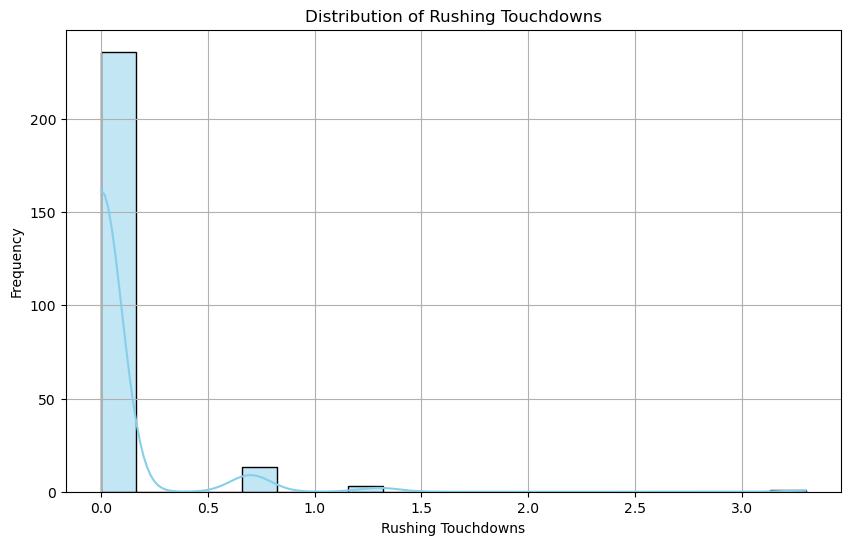

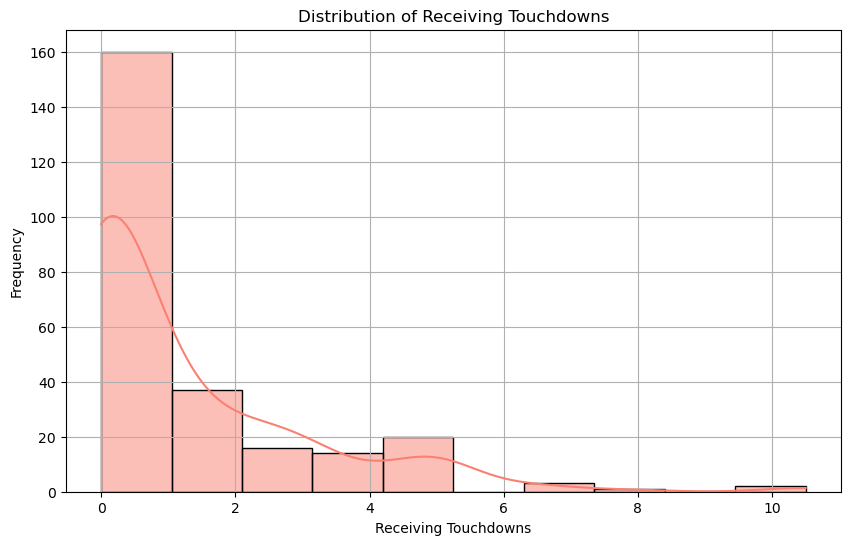

In [44]:
# Histograms for distributions of rushing and receiving touchdowns
wr_data_subset = wr_data[['RushingTouchdowns', 'ReceivingTouchdowns']]

wr_data_subset.dropna(inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data = wr_data_subset, x='RushingTouchdowns', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Rushing Touchdowns')
plt.xlabel('Rushing Touchdowns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = wr_data_subset, x='ReceivingTouchdowns', bins=10, kde=True, color='salmon')
plt.title('Distribution of Receiving Touchdowns')
plt.xlabel('Receiving Touchdowns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

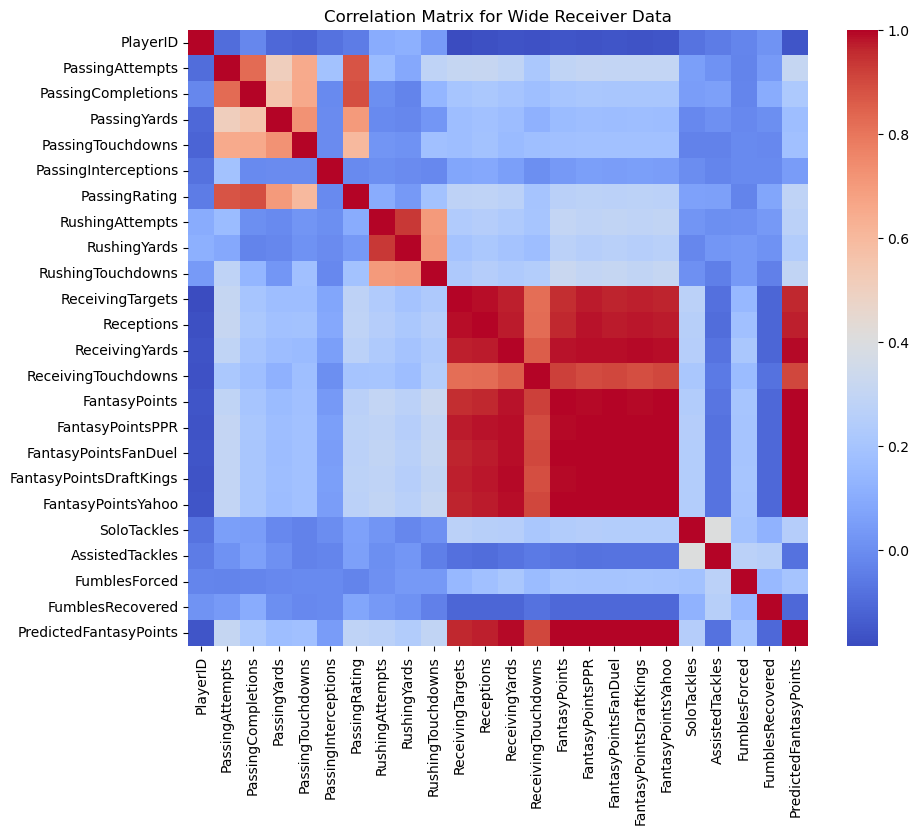

In [47]:
# Correlation heatmap for wr_data
numerical_cols_wr = wr_data.select_dtypes(include=['number']).columns.tolist()

correlation_matrix = wr_data[numerical_cols_wr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Wide Receiver Data')
plt.show()

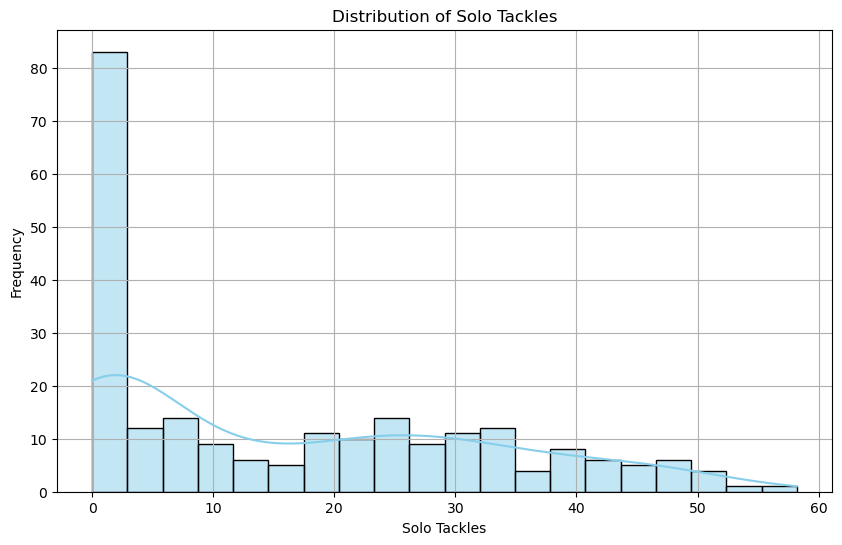

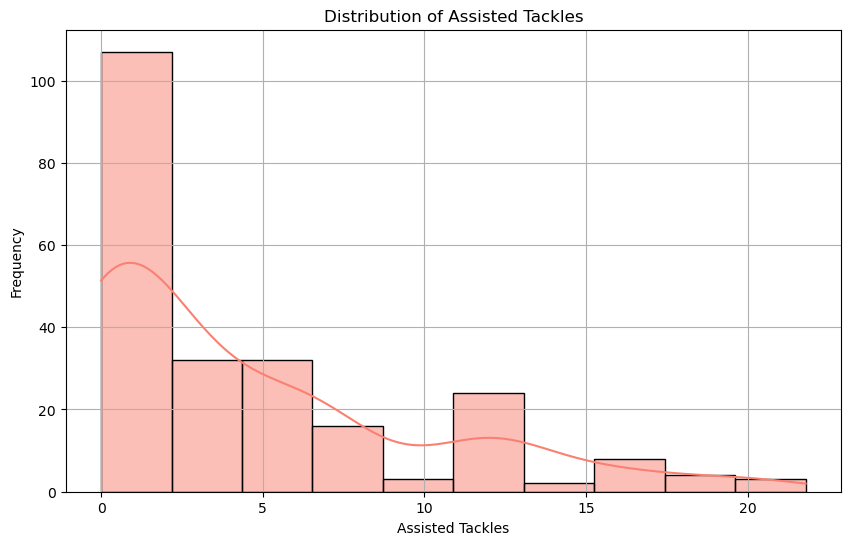

In [11]:
# Histograms for distributions of solo and assisted tackles
cb_data_subset = cb_data[['SoloTackles', 'AssistedTackles']]

cb_data_subset.dropna(inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data = cb_data_subset, x='SoloTackles', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Solo Tackles')
plt.xlabel('Solo Tackles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = cb_data_subset, x='AssistedTackles', bins=10, kde=True, color='salmon')
plt.title('Distribution of Assisted Tackles')
plt.xlabel('Assisted Tackles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

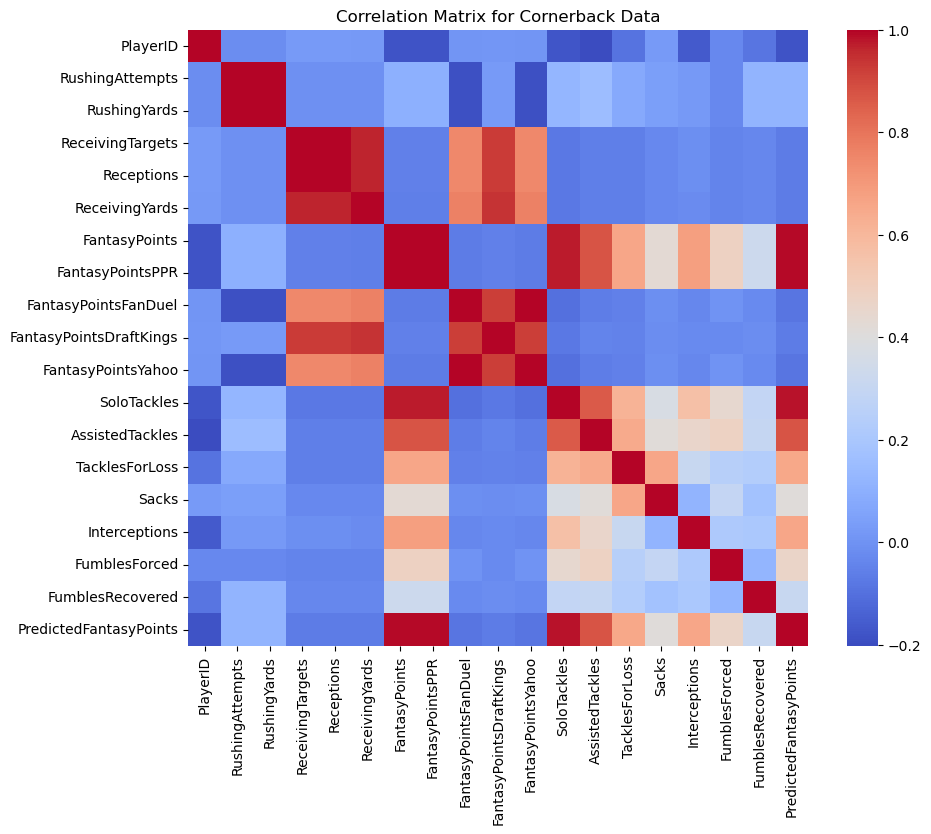

In [50]:
# Correlation heatmap for cb_data
numerical_cols_cb = cb_data.select_dtypes(include=['number']).columns.tolist()

correlation_matrix = cb_data[numerical_cols_cb].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Cornerback Data')
plt.show()

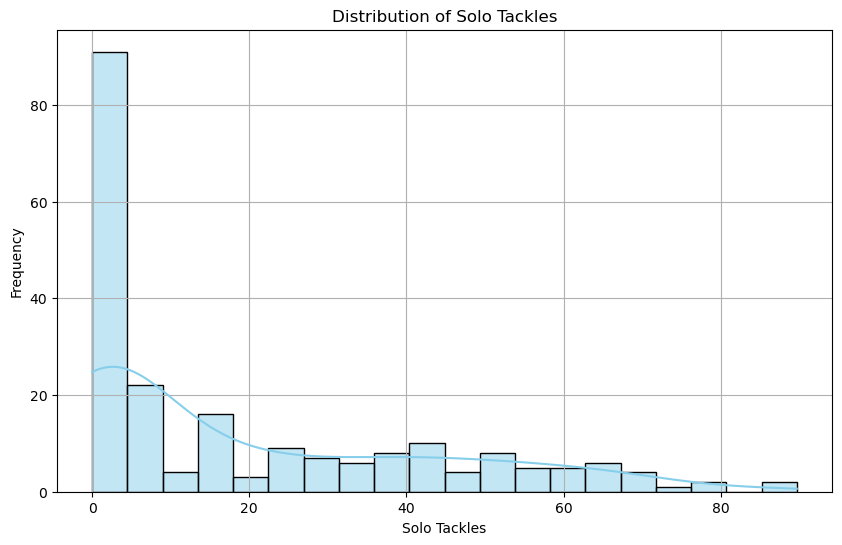

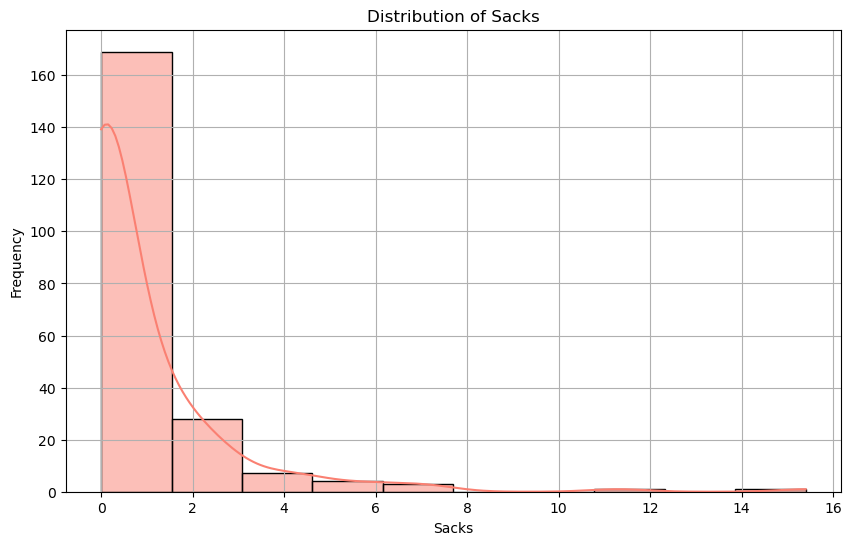

In [12]:
# Histograms for distributions of solo tackles and sacks
lb_data_subset = lb_data[['SoloTackles', 'Sacks']]

lb_data_subset.dropna(inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data = lb_data_subset, x='SoloTackles', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Solo Tackles')
plt.xlabel('Solo Tackles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = lb_data_subset, x='Sacks', bins=10, kde=True, color='salmon')
plt.title('Distribution of Sacks')
plt.xlabel('Sacks')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

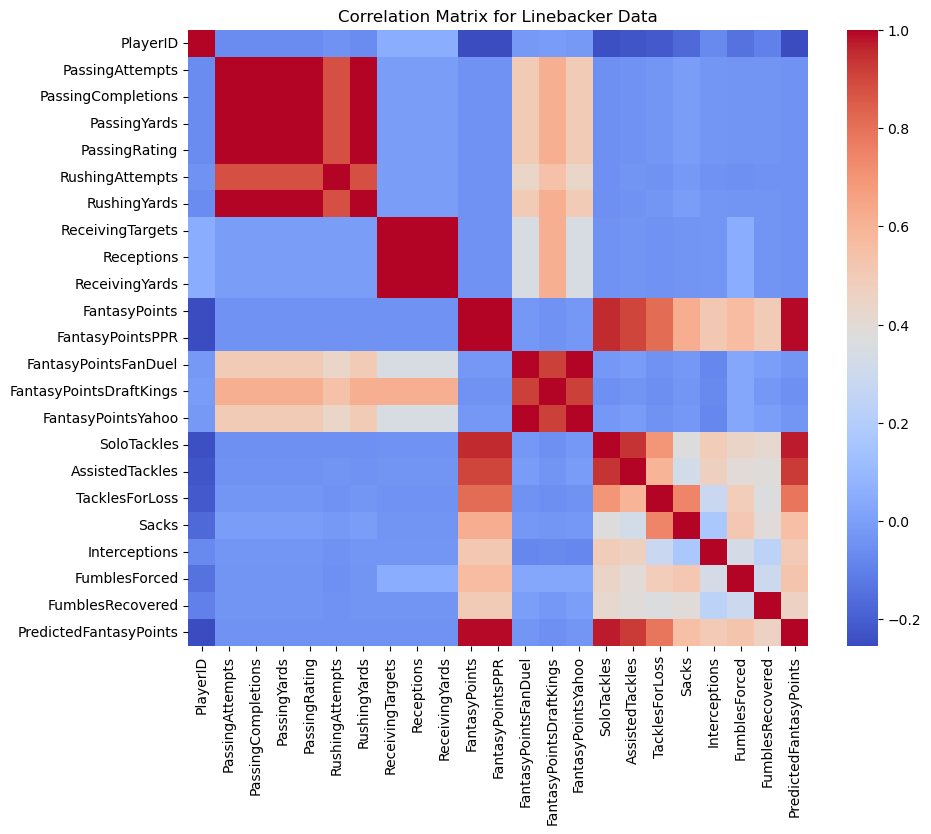

In [51]:
# Correlation heatmap for lb_data
numerical_cols_lb = lb_data.select_dtypes(include=['number']).columns.tolist()

correlation_matrix = lb_data[numerical_cols_lb].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Linebacker Data')
plt.show()

 # Part 3: Summarization

## WR

In [65]:
# Get relevant features
features = ['ReceivingYards', 'ReceivingTouchdowns', 'Receptions', 'RushingYards', 'RushingTouchdowns', 'ReceivingTargets', 'RushingAttempts']

# Split data into train and test sets
X_wr = wr_data[features]
y_wr = wr_data['FantasyPoints']
X_train_wr, X_test_wr, y_train_wr, y_test_wr = train_test_split(X_wr, y_wr, test_size=0.2, random_state=42)

# Standardize data
scaler_wr = StandardScaler()
X_train_wr_scaled = scaler_wr.fit_transform(X_train_wr)
X_test_wr_scaled = scaler_wr.transform(X_test_wr)

# Fit Random Forest model
model_wr = RandomForestRegressor(n_estimators=100, random_state=42)
model_wr.fit(X_train_wr_scaled, y_train_wr)

RandomForestRegressor(random_state=42)

In [66]:
# Make predictions
y_pred_wr = model_wr.predict(X_test_wr_scaled)

# Evaluation metrics
mse_wr = mean_squared_error(y_test_wr, y_pred_wr)
r2_wr = r2_score(y_test_wr, y_pred_wr)
mae_wr = mean_absolute_error(y_test_wr, y_pred_wr)

print(f"Mean Squared Error: {mse_wr}")
print(f"MAE: {mae_wr}")
print(f"R^2 Score: {r2_wr}")

Mean Squared Error: 32.138546372548966
MAE: 3.2215098039215704
R^2 Score: 0.9806903361102922


In [68]:
# Standardize data and make predictions for top 5 WRs
X_scaled_wr = scaler_wr.transform(X_wr)
wr_data['PredictedFantasyPoints'] = model_wr.predict(X_scaled_wr)

top_5_wrs = wr_data.sort_values(by='PredictedFantasyPoints', ascending=False).head(5)

print("Top 5 Wide Receivers based on Predicted Fantasy Points:")
print(top_5_wrs[['Name', 'PredictedFantasyPoints']])

Top 5 Wide Receivers based on Predicted Fantasy Points:
             Name  PredictedFantasyPoints
1019       C.Lamb                 204.290
334        T.Hill                 196.246
1324  A.St. Brown                 166.216
168       M.Evans                 161.375
1995      P.Nacua                 156.447


In [69]:
# Fit Gradient Boosting model
gb_model_wr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model_wr.fit(X_train_wr_scaled, y_train_wr)

# Make predictions
y_pred_gb_wr = gb_model_wr.predict(X_test_wr_scaled)

# Evaluation metrics
mse_gb_wr = mean_squared_error(y_test_wr, y_pred_gb_wr)
mae_gb_wr = mean_absolute_error(y_test_wr, y_pred_gb_wr)
r2_gb_wr = r2_score(y_test_wr, y_pred_gb_wr)

print(f"Gradient Boosting MSE: {mse_gb_wr}")
print(f"Gradient Boosting MAE: {mae_gb_wr}")
print(f"Gradient Boosting R^2: {r2_gb_wr}")

Gradient Boosting MSE: 11.836478428600959
Gradient Boosting MAE: 2.0830102594815694
Gradient Boosting R^2: 0.9928883398320316


In [70]:
# Standardize data and make predictions for top 5 WRs
wr_data['PredictedFantasyPoints_GBM'] = gb_model_wr.predict(scaler_wr.transform(X_wr))

top_5_wrs_gbm = wr_data.sort_values(by='PredictedFantasyPoints_GBM', ascending=False).head(5)

print(top_5_wrs_gbm[['Name', 'PredictedFantasyPoints_GBM']])

             Name  PredictedFantasyPoints_GBM
1019       C.Lamb                  216.590043
334        T.Hill                  207.750262
1324  A.St. Brown                  171.435890
168       M.Evans                  164.328760
1995      P.Nacua                  156.214699


## CB

In [52]:
# Get relevant features
features = ['SoloTackles', 'AssistedTackles', 'TacklesForLoss', 'Sacks', 'Interceptions', 'FumblesForced', 'FumblesRecovered']

# Split data into train and test sets
X_cb = cb_data[features]
y_cb = cb_data['FantasyPoints']
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, test_size=0.2, random_state=42)

# Standardize data
scaler_cb = StandardScaler()
X_train_cb_scaled = scaler_cb.fit_transform(X_train_cb)
X_test_cb_scaled = scaler_cb.transform(X_test_cb)

# Fit Random Forest model
model_cb = RandomForestRegressor(n_estimators=100, random_state=42)
model_cb.fit(X_train_cb_scaled, y_train_cb)

Mean Squared Error: 22.178576107142923
MAE: 2.8062886270447427
R^2 Score: 0.9705374837605457


In [53]:
# Make predictions
y_pred_cb = model_cb.predict(X_test_cb_scaled)

# Evaluation metrics
mse_cb = mean_squared_error(y_test_cb, y_pred_cb)
mae_cb = mean_absolute_error(y_test_cb, y_pred_cb)
r2_cb = r2_score(y_test_cb, y_pred_cb)

print(f"Mean Squared Error: {mse_cb}")
print(f"MAE: {mae_cb}")
print(f"R^2 Score: {r2_cb}")

Mean Squared Error: 22.178576107142923
MAE: 2.8062886270447427
R^2 Score: 0.9705374837605457


In [54]:
# Standardize data and make predictions for tops 5 CBs
X_cb_scaled = scaler_cb.transform(X_cb)
cb_data['PredictedFantasyPoints'] = model_cb.predict(X_cb_scaled)

top_5_cbs = cb_data.sort_values(by='PredictedFantasyPoints', ascending=False).head(5)
print(top_5_cbs[['Name', 'PredictedFantasyPoints']])

               Name  PredictedFantasyPoints
1806        D.Bland                  95.021
510      K.Moore II                  93.869
712          C.Ward                  89.723
1369        P.Adebo                  88.445
2005  D.Witherspoon                  88.433


In [59]:
# Fit Gradient Boosting model
gb_model_cb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model_cb.fit(X_train_cb_scaled, y_train_cb)

# Make predictions
y_pred_gb_cb = gb_model_cb.predict(X_test_cb_scaled)

# Evaluation metrics
mse_gb_cb = mean_squared_error(y_test_cb, y_pred_gb_cb)
mae_gb_cb = mean_absolute_error(y_test_cb, y_pred_gb_cb)
r2_gb_cb = r2_score(y_test_cb, y_pred_gb_cb)

print(f"Gradient Boosting MSE: {mse_gb_cb}")
print(f"Gradient Boosting MAE: {mae_gb_cb}")
print(f"Gradient Boosting R^2: {r2_gb_cb}")

Gradient Boosting MSE: 10.321352519045181
Gradient Boosting MAE: 1.969925774872889
Gradient Boosting R^2: 0.9862888846093432


In [60]:
# Standardize data and make predictions for top 5 CBs
cb_data['PredictedFantasyPoints_GBM'] = gb_model_cb.predict(scaler_cb.transform(X_cb))

top_5_cbs_gbm = cb_data.sort_values(by='PredictedFantasyPoints_GBM', ascending=False).head(5)

print(top_5_cbs_gbm[['Name', 'PredictedFantasyPoints_GBM']])

               Name  PredictedFantasyPoints_GBM
1806        D.Bland                  110.048324
510      K.Moore II                   97.821252
2005  D.Witherspoon                   92.504925
712          C.Ward                   91.242654
1369        P.Adebo                   89.470314


# LB

In [55]:
# Get relevant features
features = ['SoloTackles', 'AssistedTackles', 'TacklesForLoss', 'Sacks', 'Interceptions', 'FumblesForced', 'FumblesRecovered']

# Split data into train and test sets
X_lb = lb_data[features]
y_lb = lb_data['FantasyPoints']
X_train_lb, X_test_lb, y_train_lb, y_test_lb = train_test_split(X_lb, y_lb, test_size=0.2, random_state=42)

# Standardize data
scaler_lb = StandardScaler()
X_train_lb_scaled = scaler_lb.fit_transform(X_train_lb)
X_test_lb_scaled = scaler_lb.transform(X_test_lb)

# Fit Random Forest model
model_lb = RandomForestRegressor(n_estimators=100, random_state=42)
model_lb.fit(X_train_lb_scaled, y_train_lb)

RandomForestRegressor(random_state=42)

In [56]:
# Make predictions
y_pred_lb = model_lb.predict(X_test_lb_scaled)

# Evaluation metrics
mse_lb = mean_squared_error(y_test_lb, y_pred_lb)
mae_lb = mean_absolute_error(y_test_lb, y_pred_lb)
r2_lb = r2_score(y_test_lb, y_pred_lb)

print(f"Mean Squared Error: {mse_lb}")
print(f"MAE: {mae_lb}")
print(f"R^2 Score: {r2_lb}")

Mean Squared Error: 96.47794714989614
MAE: 4.0273716500553745
R^2 Score: 0.9378767973950597


In [57]:
# Standardize data and make predictions for top 5 LBs
X_lb_scaled = scaler_lb.transform(X_lb)
lb_data['PredictedFantasyPoints'] = model_lb.predict(X_lb_scaled)

top_5_lbs = lb_data.sort_values(by='PredictedFantasyPoints', ascending=False).head(5)
print(top_5_lbs[['Name', 'PredictedFantasyPoints']])

            Name  PredictedFantasyPoints
667    F.Oluokun                 147.505
66      B.Wagner                 134.988
771    T.Edwards                 134.774
674   Z.Franklin                 133.129
1727   T.Bernard                 132.479


In [72]:
# Fit Gradient Boosting model
gb_model_lb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model_lb.fit(X_train_lb_scaled, y_train_lb)

# Make predictions
y_pred_gb_lb = gb_model_lb.predict(X_test_lb_scaled)

# Evaluation metrics
mse_gb_lb = mean_squared_error(y_test_lb, y_pred_gb_lb)
mae_gb_lb = mean_absolute_error(y_test_lb, y_pred_gb_lb)
r2_gb_lb = r2_score(y_test_lb, y_pred_gb_lb)

print(f"Gradient Boosting MSE: {mse_gb_lb}")
print(f"Gradient Boosting MAE: {mae_gb_lb}")
print(f"Gradient Boosting R^2: {r2_gb_lb}")

Gradient Boosting MSE: 82.50618796624431
Gradient Boosting MAE: 3.494360134714469
Gradient Boosting R^2: 0.9468733655451353


In [73]:
# Standardize data and make predictions for top 5 LBs
lb_data['PredictedFantasyPoints_GBM'] = gb_model_lb.predict(scaler_lb.transform(X_lb))

top_5_lbs_gbm = lb_data.sort_values(by='PredictedFantasyPoints_GBM', ascending=False).head(5)

print(top_5_lbs_gbm[['Name', 'PredictedFantasyPoints_GBM']])

            Name  PredictedFantasyPoints_GBM
667    F.Oluokun                  153.352563
66      B.Wagner                  138.709161
1727   T.Bernard                  138.242423
771    T.Edwards                  136.820276
674   Z.Franklin                  132.710712


# Results
After rigorous preprocessing and feature selection, we trained two regression models: the Random Forest Regressor and the Gradient Boosting Regressor. Our evaluation criteria were grounded in three metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²). Upon evaluation, the Gradient Boosting Regressor consistently outperformed the Random Forest Regressor across all positions and metrics. The superiority of the Gradient Boosting Regressor was especially pronounced in its ability to predict fantasy points for WRs, CBs, and LBs with a higher degree of accuracy and lower error rates. This model's effectiveness can be attributed to its capacity for learning complex, non-linear relationships within the data, and its proficiency in adjusting to the intricacies of NFL player performance metrics.

Our analysis revealed that certain features were highly predictive of player performance. For wide receivers, receiving yards, touchdowns, and receptions were crucial. For cornerbacks and linebackers, the number of tackles, sacks, and interceptions emerged as significant predictors. These findings align with the intuitive understanding of the roles these positions play on the field but underscore the quantitative impact these specific actions have on overall performance.

The Gradient Boosting Regressor achieved a high degree of predictive accuracy, with R² values indicating a strong fit to the data. This suggests that our model can reliably predict player performance in these roles, offering valuable insights for team strategists and fantasy football participants alike.

While our models performed well overall, the MSE and MAE metrics highlighted areas for potential improvement. Specifically, the models' predictions for players with outlier performances (either exceptionally high or low) were less accurate, suggesting that incorporating additional features or adjusting model parameters could further enhance performance.

The comparative analysis between the Random Forest and Gradient Boosting models offered valuable lessons in model selection and optimization. The Gradient Boosting model's adaptability and learning efficiency highlighted the importance of choosing the right model architecture for specific types of predictive tasks in sports analytics.